# Advanced example

In this example, we will show how to run CorrAdjust with several feature types (miRNA-mRNA correlations) and several sample groups (male and female samples). The RNA-seq datasets from lymphoblastoid cell lines (LCLs) for the example are taken from the collection generated by [the Geuvadis consortium](https://doi.org/10.1038/nature12531).

## Loading and normalizing the data

The below code for reading and normalizing expression data is similar to the previous one with one exception. Specifically, we normalize mRNA and small non-coding RNA (sncRNA) matrices separately, since the datasets come from different experiments and should not be normalized together. *After* normalization, we concatenate the matrices.

In [16]:
# Read the data; both tables have identical index
df_counts_mRNA = pd.read_csv(
    "input_data/Geuvadis/raw_counts_mRNA.tsv",
    sep="\t", index_col=0
)
df_counts_sncRNA = pd.read_csv(
    "input_data/Geuvadis/raw_counts_sncRNA.tsv",
    sep="\t", index_col=0
)

# Split into training and test samples
df_counts_mRNA_train = df_counts_mRNA.iloc[::2]
df_counts_mRNA_test = df_counts_mRNA.iloc[1::2]
df_counts_sncRNA_train = df_counts_sncRNA.iloc[::2]
df_counts_sncRNA_test = df_counts_sncRNA.iloc[1::2]

# Normalize mRNA and sncRNA data separately
normalizer = MedianOfRatios()
normalizer.fit(df_counts_mRNA_train)
df_norm_counts_mRNA_train = normalizer.transform(df_counts_mRNA_train)
df_norm_counts_mRNA_test = normalizer.transform(df_counts_mRNA_test)

normalizer = MedianOfRatios()
normalizer.fit(df_counts_sncRNA_train)
df_norm_counts_sncRNA_train = normalizer.transform(df_counts_sncRNA_train)
df_norm_counts_sncRNA_test = normalizer.transform(df_counts_sncRNA_test)

# Concatenate mRNA and sncRNA data
df_norm_counts_train = pd.concat(
    [df_norm_counts_sncRNA_train, df_norm_counts_mRNA_train],
    axis=1
)
df_norm_counts_test = pd.concat(
    [df_norm_counts_sncRNA_test, df_norm_counts_mRNA_test],
    axis=1
)

# Log-transform
df_data_train = np.log2(df_norm_counts_train + 1)
df_data_test = np.log2(df_norm_counts_test + 1)

display(df_data_train)

,tRF-33-79MP9P9NH57SD3,iso-23-2HOMKBFPDP,rRF-18-WLLINPD4,tRF-33-Z3M8ZLSSXUOLD2,iso-22-X2EUIRIKQ,iso-22-BQ8DQWM4H,iso-24-YEQOW4HK2E,yRF-27-KR2Y4BZUNJQ,tRF-18-HR6HFRD2,iso-24-VY2ZSR672F,...,ENSG00000198712.1,ENSG00000228253.1,ENSG00000198899.2,ENSG00000198938.2,ENSG00000198840.2,ENSG00000212907.2,ENSG00000198886.2,ENSG00000198786.2,ENSG00000198695.2,ENSG00000198727.2
TSI_NA20508.1.MI,15.375467,15.768876,14.386797,11.509986,17.077093,16.831354,16.979418,15.446145,17.407458,15.867370,...,16.957235,12.100007,16.197138,17.012233,13.547551,13.994002,17.536592,16.437674,14.407458,15.823431
FIN_HG00315.2.MI,17.004050,14.824433,15.759253,13.413163,14.623674,14.236777,15.006757,14.406483,15.180716,14.415009,...,16.971874,12.258090,15.962215,17.203759,13.432169,13.696331,17.444533,16.435032,15.052151,16.405424
FIN_HG00377.2.MI,17.363959,16.194561,15.104459,11.785276,15.627775,15.123750,15.992820,15.160283,14.282834,15.429691,...,17.195135,12.745818,16.419661,17.434837,13.754321,13.820417,17.623701,16.587501,15.150230,16.501734
CEU_NA07056.1.MI,17.097118,17.129173,17.445657,14.503363,16.753292,14.451858,15.225481,14.832857,15.499062,15.173789,...,18.067899,12.790246,17.218922,18.242186,14.478591,14.349128,18.692826,17.028353,15.858036,16.719261
YRI_NA19119.3.MI,16.795022,17.570451,15.459582,11.381865,17.177996,15.552042,16.201064,15.789840,17.553967,16.495589,...,16.224141,12.177533,15.455781,16.560902,13.195824,13.352683,16.708912,15.811658,14.117363,15.174058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GBR_HG01791.2.MI,16.126779,15.715584,14.766975,15.139796,16.288074,16.552333,15.605472,14.096111,16.977521,15.361669,...,16.720027,12.270003,15.723737,16.764922,13.368546,13.347992,17.085581,16.192440,14.622754,15.805635
FIN_HG00362.3.MI,17.121267,16.418557,13.368475,14.779898,16.243674,15.027084,15.819105,15.377365,13.327610,15.522643,...,16.910549,12.079542,15.968046,17.013613,13.524998,13.623903,17.297789,16.082245,14.738878,15.962373
CEU_NA07000.1.MI,16.410787,17.711002,17.774399,12.880337,17.419655,16.219216,16.623148,15.430145,17.526397,16.129083,...,17.297790,11.366524,16.511681,17.707241,14.237225,14.045978,18.140950,16.570033,15.179156,16.700573
YRI_NA18861.4.MI,15.755783,16.457623,15.142608,11.822476,16.368148,16.651518,16.597095,15.635380,16.886426,16.344094,...,13.245564,9.010921,12.461696,13.331866,10.670205,10.269527,14.117214,14.357536,12.045723,13.455430


Fene annotation file also follows the same format but now we have two feature types (`sncRNA` and `mRNA`):

In [17]:
df_feature_ann = pd.read_csv(
    "input_data/Geuvadis/gene_annotation.tsv",
    sep="\t", index_col=0
)
display(df_feature_ann)

,feature_name,feature_type
feature_id,,
tRF-33-79MP9P9NH57SD3,tRF-33-79MP9P9NH57SD3,sncRNA
iso-23-2HOMKBFPDP,iso-23-2HOMKBFPDP&hsa-miR-191-5p|0|0,sncRNA
rRF-18-WLLINPD4,rRF-18-WLLINPD4,sncRNA
tRF-33-Z3M8ZLSSXUOLD2,tRF-33-Z3M8ZLSSXUOLD2,sncRNA
iso-22-X2EUIRIKQ,iso-22-X2EUIRIKQ&hsa-miR-146a-5p|0|0,sncRNA
...,...,...
ENSG00000212907.2,MT-ND4L,mRNA
ENSG00000198886.2,MT-ND4,mRNA
ENSG00000198786.2,MT-ND5,mRNA


Finally, we read a table with annotation of samples (male and female). Note that the `group` column could have an arbitrary number of different values.

In [18]:
df_samp_ann = pd.read_csv(
    "input_data/Geuvadis/sample_annotation.tsv",
    sep="\t", index_col=0
)
df_samp_ann_train = df_samp_ann.iloc[::2]
df_samp_ann_test = df_samp_ann.iloc[1::2]
display(df_samp_ann_train)

,group
sample,
TSI_NA20508.1.MI,female
FIN_HG00315.2.MI,female
FIN_HG00377.2.MI,female
CEU_NA07056.1.MI,female
YRI_NA19119.3.MI,male
...,...
GBR_HG01791.2.MI,male
FIN_HG00362.3.MI,female
CEU_NA07000.1.MI,female


As a reference feature pair sets, we will use experimentally validated targets from [TarBase v9](https://doi.org/10.1093/nar/gkad1071). Note that targets are available only for canonical isomiRs (isomiRs with |0|0 suffix), while expression data has both canonical and non-canonical ones, as well as other non-isomiR sncRNAs.

In [19]:
ref_feature_colls = {
    "TarBase": {
        "path": "input_data/GMT_files/TarBase.gmt",
        # We expect targets among negative miRNA-mRNA correlations
        "sign": "negative",
        "feature_pair_types": ["sncRNA-mRNA"],
        # Good default value for miRNA-mRNA analysis
        "high_corr_frac": 0.05
    }
}

## Training the model

Now we create and fit the model, passing sample annotation as an additional argument to `fit`.

2025-02-28 20:01:28.968561 | Loading TarBase reference collection...
2025-02-28 20:01:31.982782 | Computing PCA...
2025-02-28 20:01:33.001837 | Starting PC optimization...
100%|██████████████████████████████████████████████████████████████| 154/154 [24:48<00:00,  9.67s/it]


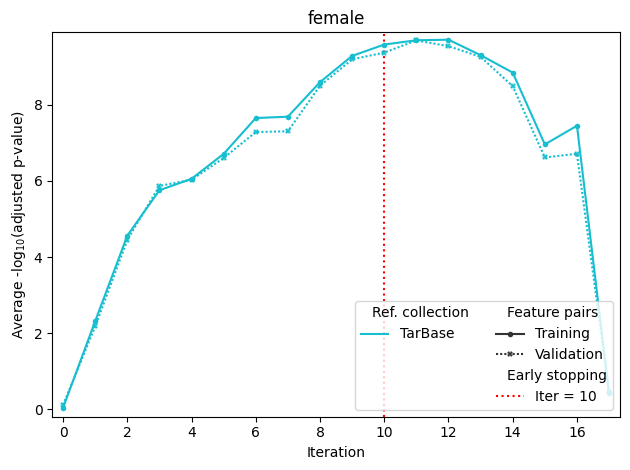

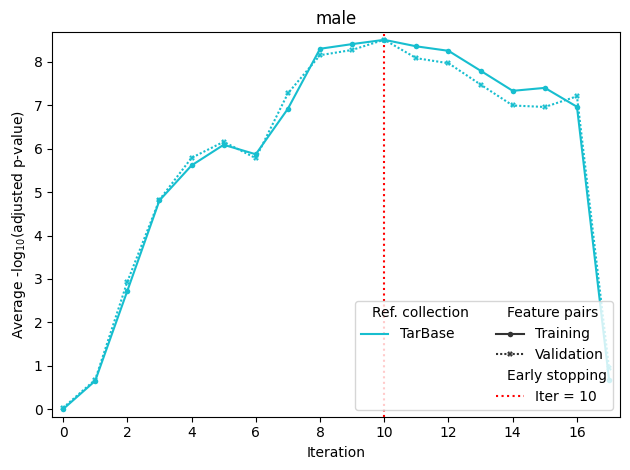

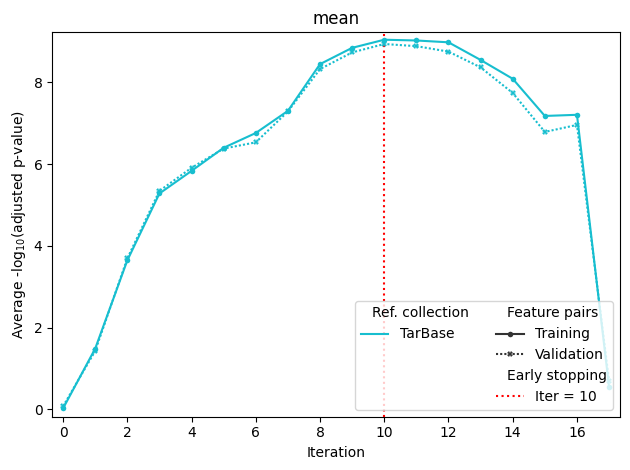

In [20]:
model = CorrAdjust(
    df_feature_ann,
    ref_feature_colls,
    "out_data/Geuvadis"
)
model.fit(
    df_data_train,
    df_samp_ann=df_samp_ann_train,
    # Set n_PCs value from paper
    n_PCs=17
)

If sample annotation with more than one group is passed to `fit`, it will produce separate optimization plots for each group. The last plot stands for mean scores (in this case, mean of male and female scores). Mean training score is used for maximization, and mean validation score is used for early stopping.

## Using the trained model

Calls of all downstream methods should include sample annotation and sample group name. To avoid code duplication, this can be done in a loop.

2025-02-28 20:26:24.436736 | Computing raw correlations for female...
2025-02-28 20:26:26.703805 | Computing corrected correlations for female...
2025-02-28 20:26:36.252894 | Computing raw correlations for female...
2025-02-28 20:26:38.543961 | Computing corrected correlations for female...
2025-02-28 20:26:48.916197 | Computing raw correlations for female...
2025-02-28 20:26:51.184528 | Computing corrected correlations for female...
2025-02-28 20:26:56.129525 | Starting export to file...
100%|██████████████████████████████████████████████████████████████| 125/125 [05:22<00:00,  2.58s/it]


Chunk of corrs.test_samples.female.tsv:


,feature_id1,feature_id2,feature_name1,feature_name2,feature_type1,feature_type2,corr_clean,pvalue_clean,corr_raw,pvalue_raw,TarBase_flag,TarBase_trainval
1587,iso-22-VFPFU47YP,ENSG00000082701.17,iso-22-VFPFU47YP&hsa-miR-15a-5p|0|0,GSK3B,sncRNA,mRNA,-0.715228,3.162188e-31,0.134124,0.057662,1,0
4837,iso-23-U0XZH3PK0H,ENSG00000082701.17,iso-23-U0XZH3PK0H&hsa-miR-20a-5p|0|0,GSK3B,sncRNA,mRNA,-0.683877,1.117633e-27,0.244307,0.000474,1,0
6494,iso-23-20XYYWPK0H,ENSG00000131023.13,iso-23-20XYYWPK0H&hsa-miR-93-5p|0|0,LATS1,sncRNA,mRNA,-0.675366,8.629332e-27,0.179440,0.010808,1,0
6997,iso-22-83PI02EZN,ENSG00000118513.19,iso-22-83PI02EZN&hsa-miR-148a-3p|0|0,MYB,sncRNA,mRNA,-0.673046,1.488833e-26,-0.276047,0.000073,1,1
7477,iso-23-9P9Z35ZQDX,ENSG00000082701.17,iso-23-9P9Z35ZQDX&hsa-miR-142-3p|0|0,GSK3B,sncRNA,mRNA,-0.670901,2.454460e-26,0.186854,0.007907,0,1
7712,iso-23-J42LSNSO9,ENSG00000109171.15,iso-23-J42LSNSO9&hsa-miR-301a-3p|0|0,SLAIN2,sncRNA,mRNA,-0.669953,3.056737e-26,0.061544,0.385438,1,0
9829,iso-22-URIVHM63P,ENSG00000060237.18,iso-22-URIVHM63P&hsa-miR-660-5p|0|0,WNK1,sncRNA,mRNA,-0.662119,1.820237e-25,0.173901,0.013552,1,1
10006,iso-23-U0XZH3PK0H,ENSG00000109171.15,iso-23-U0XZH3PK0H&hsa-miR-20a-5p|0|0,SLAIN2,sncRNA,mRNA,-0.661582,2.052673e-25,0.167919,0.017184,1,1
10875,iso-23-J42LSNSO9,ENSG00000082701.17,iso-23-J42LSNSO9&hsa-miR-301a-3p|0|0,GSK3B,sncRNA,mRNA,-0.658831,3.787756e-25,0.290319,0.000029,1,1
11858,iso-23-J424HNSO9,ENSG00000048405.10,iso-23-J424HNSO9&hsa-miR-301b-3p|0|0,ZNF800,sncRNA,mRNA,-0.655913,7.202982e-25,0.169388,0.016221,1,0


2025-02-28 20:32:19.835571 | Computing raw correlations for male...
2025-02-28 20:32:22.327870 | Computing corrected correlations for male...
2025-02-28 20:32:32.340275 | Computing raw correlations for male...
2025-02-28 20:32:34.848362 | Computing corrected correlations for male...
2025-02-28 20:32:45.141563 | Computing raw correlations for male...
2025-02-28 20:32:47.713209 | Computing corrected correlations for male...
2025-02-28 20:32:52.741026 | Starting export to file...
100%|███████████████████████████████████████████████████████████████| 125/125 [05:14<00:00,  2.52s/it]


Chunk of corrs.test_samples.male.tsv:


,feature_id1,feature_id2,feature_name1,feature_name2,feature_type1,feature_type2,corr_clean,pvalue_clean,corr_raw,pvalue_raw,TarBase_flag,TarBase_trainval
21390,iso-23-20XYYWPK0H,ENSG00000130338.13,iso-23-20XYYWPK0H&hsa-miR-93-5p|0|0,TULP4,sncRNA,mRNA,-0.655115,8.576050e-25,-0.066628,0.347335,1,1
21892,iso-21-42NBQRZ00,ENSG00000009307.16,iso-21-42NBQRZ00&hsa-miR-151a-3p|0|0,CSDE1,sncRNA,mRNA,-0.654322,1.019516e-24,-0.175774,0.012562,0,1
29488,iso-23-U0XZH3PK0H,ENSG00000082701.17,iso-23-U0XZH3PK0H&hsa-miR-20a-5p|0|0,GSK3B,sncRNA,mRNA,-0.643953,9.335504e-24,0.120305,0.088911,1,0
32337,iso-21-42NBQRZ00,ENSG00000138593.9,iso-21-42NBQRZ00&hsa-miR-151a-3p|0|0,SECISBP2L,sncRNA,mRNA,-0.640631,1.863912e-23,-0.189063,0.007188,0,1
34594,iso-22-J424IB1JI,ENSG00000118058.23,iso-22-J424IB1JI&hsa-miR-130b-3p|0|0,KMT2A,sncRNA,mRNA,-0.638107,3.134571e-23,0.211219,0.002613,1,1
41222,iso-23-20XZ03PK0H,ENSG00000102908.22,iso-23-20XZ03PK0H&hsa-miR-17-5p|0|0,NFAT5,sncRNA,mRNA,-0.631484,1.198429e-22,0.170516,0.015514,1,1
42711,iso-21-W05I2PWPE,ENSG00000009307.16,iso-21-W05I2PWPE&hsa-miR-151a-5p|0|0,CSDE1,sncRNA,mRNA,-0.630074,1.587678e-22,-0.113037,0.110109,1,1
44583,iso-23-20XZ03PK0H,ENSG00000110367.13,iso-23-20XZ03PK0H&hsa-miR-17-5p|0|0,DDX6,sncRNA,mRNA,-0.628444,2.194175e-22,0.084632,0.232272,1,0
46898,iso-22-XKVL7YXYQ,ENSG00000118058.23,iso-22-XKVL7YXYQ&hsa-let-7i-5p|0|0,KMT2A,sncRNA,mRNA,-0.626423,3.267926e-22,0.112801,0.110857,1,1
49526,iso-23-U0XZH3PK0H,ENSG00000110367.13,iso-23-U0XZH3PK0H&hsa-miR-20a-5p|0|0,DDX6,sncRNA,mRNA,-0.624238,5.011761e-22,0.033899,0.632831,1,1


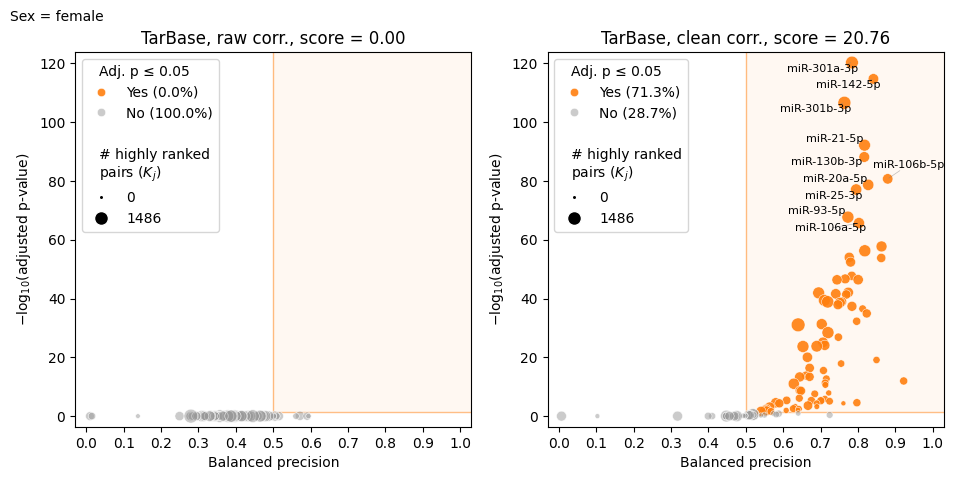

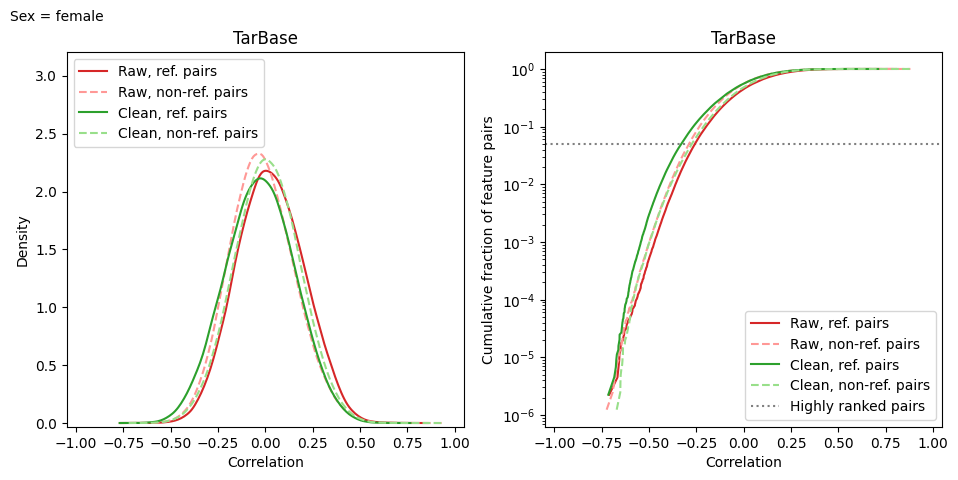

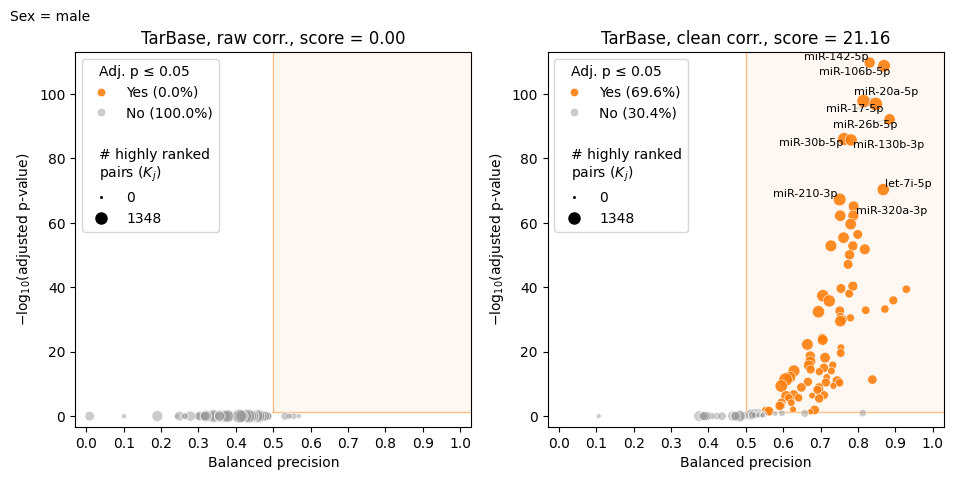

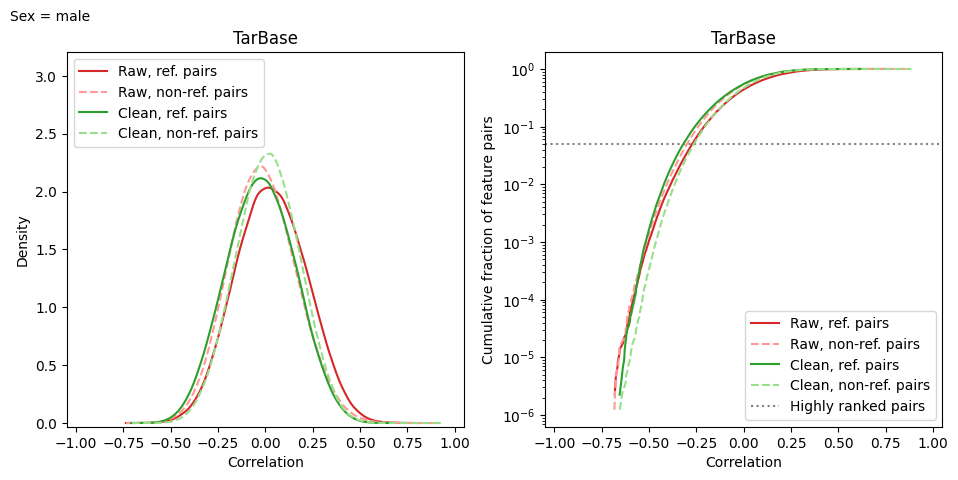

In [21]:
for samp_group in ["female", "male"]:
    feature_scores = model.compute_feature_scores(
        df_data_test,
        df_samp_ann=df_samp_ann_test,
        samp_group=samp_group
    )

    # This attribute adds title in top-left corners of plots
    model.title = f"Sex = {samp_group}"
    
    model.make_volcano_plot(
        feature_scores,
        f"volcano.test_samples.{samp_group}.png",
        annotate_features=10,
        # Use formatter function to shorten isomiR names
        feature_name_fmt=lambda name: name.split("hsa-")[1].split("|")[0]
    )
    
    model.make_corr_distr_plot(
        df_data_test,
        f"corr_distr.test_samples.{samp_group}.png",
        df_samp_ann=df_samp_ann_test,
        samp_group=samp_group
    )
    
    model.export_corrs(
        df_data_test,
        f"corrs.test_samples.{samp_group}.tsv",
        df_samp_ann=df_samp_ann_test,
        samp_group=samp_group
    )

    # These lines just show a representative chunk of the file
    corrs = pd.read_csv(
        f"out_data/Geuvadis/corrs.test_samples.{samp_group}.tsv",
        sep="\t", nrows=100000
    )
    print(f"Chunk of corrs.test_samples.{samp_group}.tsv:")
    display(corrs.loc[corrs["TarBase_flag"] != -1].head(10))

The only method that doesn't require group name is `transform`, since all samples are cleaned together.

In [22]:
df_data_test_clean, df_rsquareds = model.transform(
    df_data_test,
    df_samp_ann_test
)
display(df_data_test_clean)

,tRF-33-79MP9P9NH57SD3,iso-23-2HOMKBFPDP,rRF-18-WLLINPD4,tRF-33-Z3M8ZLSSXUOLD2,iso-22-X2EUIRIKQ,iso-22-BQ8DQWM4H,iso-24-YEQOW4HK2E,yRF-27-KR2Y4BZUNJQ,tRF-18-HR6HFRD2,iso-24-VY2ZSR672F,...,ENSG00000198712.1,ENSG00000228253.1,ENSG00000198899.2,ENSG00000198938.2,ENSG00000198840.2,ENSG00000212907.2,ENSG00000198886.2,ENSG00000198786.2,ENSG00000198695.2,ENSG00000198727.2
CEU_NA12812.1.MI,-0.620065,-0.310726,-0.249793,1.290901,0.281442,-0.050428,0.527796,-0.401979,-0.772192,-0.512847,...,0.158439,0.173913,0.427129,0.534144,0.454318,0.439413,0.549146,0.316825,0.381061,0.078790
CEU_NA12749.1.MI,-1.106119,-0.628111,-1.249008,0.616152,0.206401,-0.108065,0.103019,0.038530,1.169227,-0.064189,...,-0.344318,-0.269753,-0.155804,-0.453415,-0.155392,-0.505204,-0.384939,-0.579743,-0.510531,-0.332724
TSI_NA20510.3.MI,0.195529,-0.151787,0.250982,-0.509563,0.062368,-0.322359,-0.387207,0.716692,0.794845,-0.685646,...,0.132211,0.255880,0.054310,-0.062379,0.110532,0.161819,0.200947,0.060922,0.095826,-0.142283
GBR_HG00155.1.MI,-0.053329,-0.300658,0.170739,-0.383377,-0.068466,-0.254343,-0.439967,-0.292031,1.943921,-0.449839,...,-0.092572,-0.054234,0.190476,0.035316,0.234884,0.145346,0.030836,-0.008509,-0.025680,0.144530
FIN_HG00350.3.MI,0.525551,-0.086287,0.157886,-0.400232,0.006228,-0.445866,-0.210717,0.212302,1.625556,-0.428203,...,-0.038814,-0.153922,-0.146719,0.017803,0.096110,-0.301353,0.002004,-0.402903,-0.169281,-0.109961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CEU_NA12778.1.MI,0.581613,-0.307854,1.827755,0.375388,0.559242,0.283521,-0.132107,0.957126,0.674212,-0.213702,...,0.122245,-0.301193,0.274027,0.291671,-0.014586,-0.008767,0.404175,0.418945,0.170228,0.276137
TSI_NA20761.1.MI,0.427250,-0.000609,1.854137,-0.967633,0.286078,-0.553838,-0.271268,0.738555,0.066126,-0.495017,...,-0.095754,-1.027643,-0.271515,-0.459521,-0.555034,-0.464335,0.236649,0.014550,0.192458,-0.273718
FIN_HG00308.3.MI,0.049832,0.064105,0.216882,0.504403,-0.077997,-0.153369,-0.179680,-0.236491,0.524470,0.310773,...,0.224791,0.431358,0.144727,0.234761,0.124680,0.232421,0.155974,-0.221077,-0.224894,-0.307741
CEU_NA12399.7.MI,0.996266,-0.470806,-0.691879,0.213296,-0.218509,0.302927,0.066839,0.112897,-1.323507,0.208681,...,-0.306433,0.255695,-0.451077,-0.298684,-0.363276,-0.000983,-0.401184,-0.278655,-0.341041,-0.359523
